# The Sparks Foundation- Task 2
## Prediction using Unsupervised ML 
### by Praveen Shahani

### Problem Statement-From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

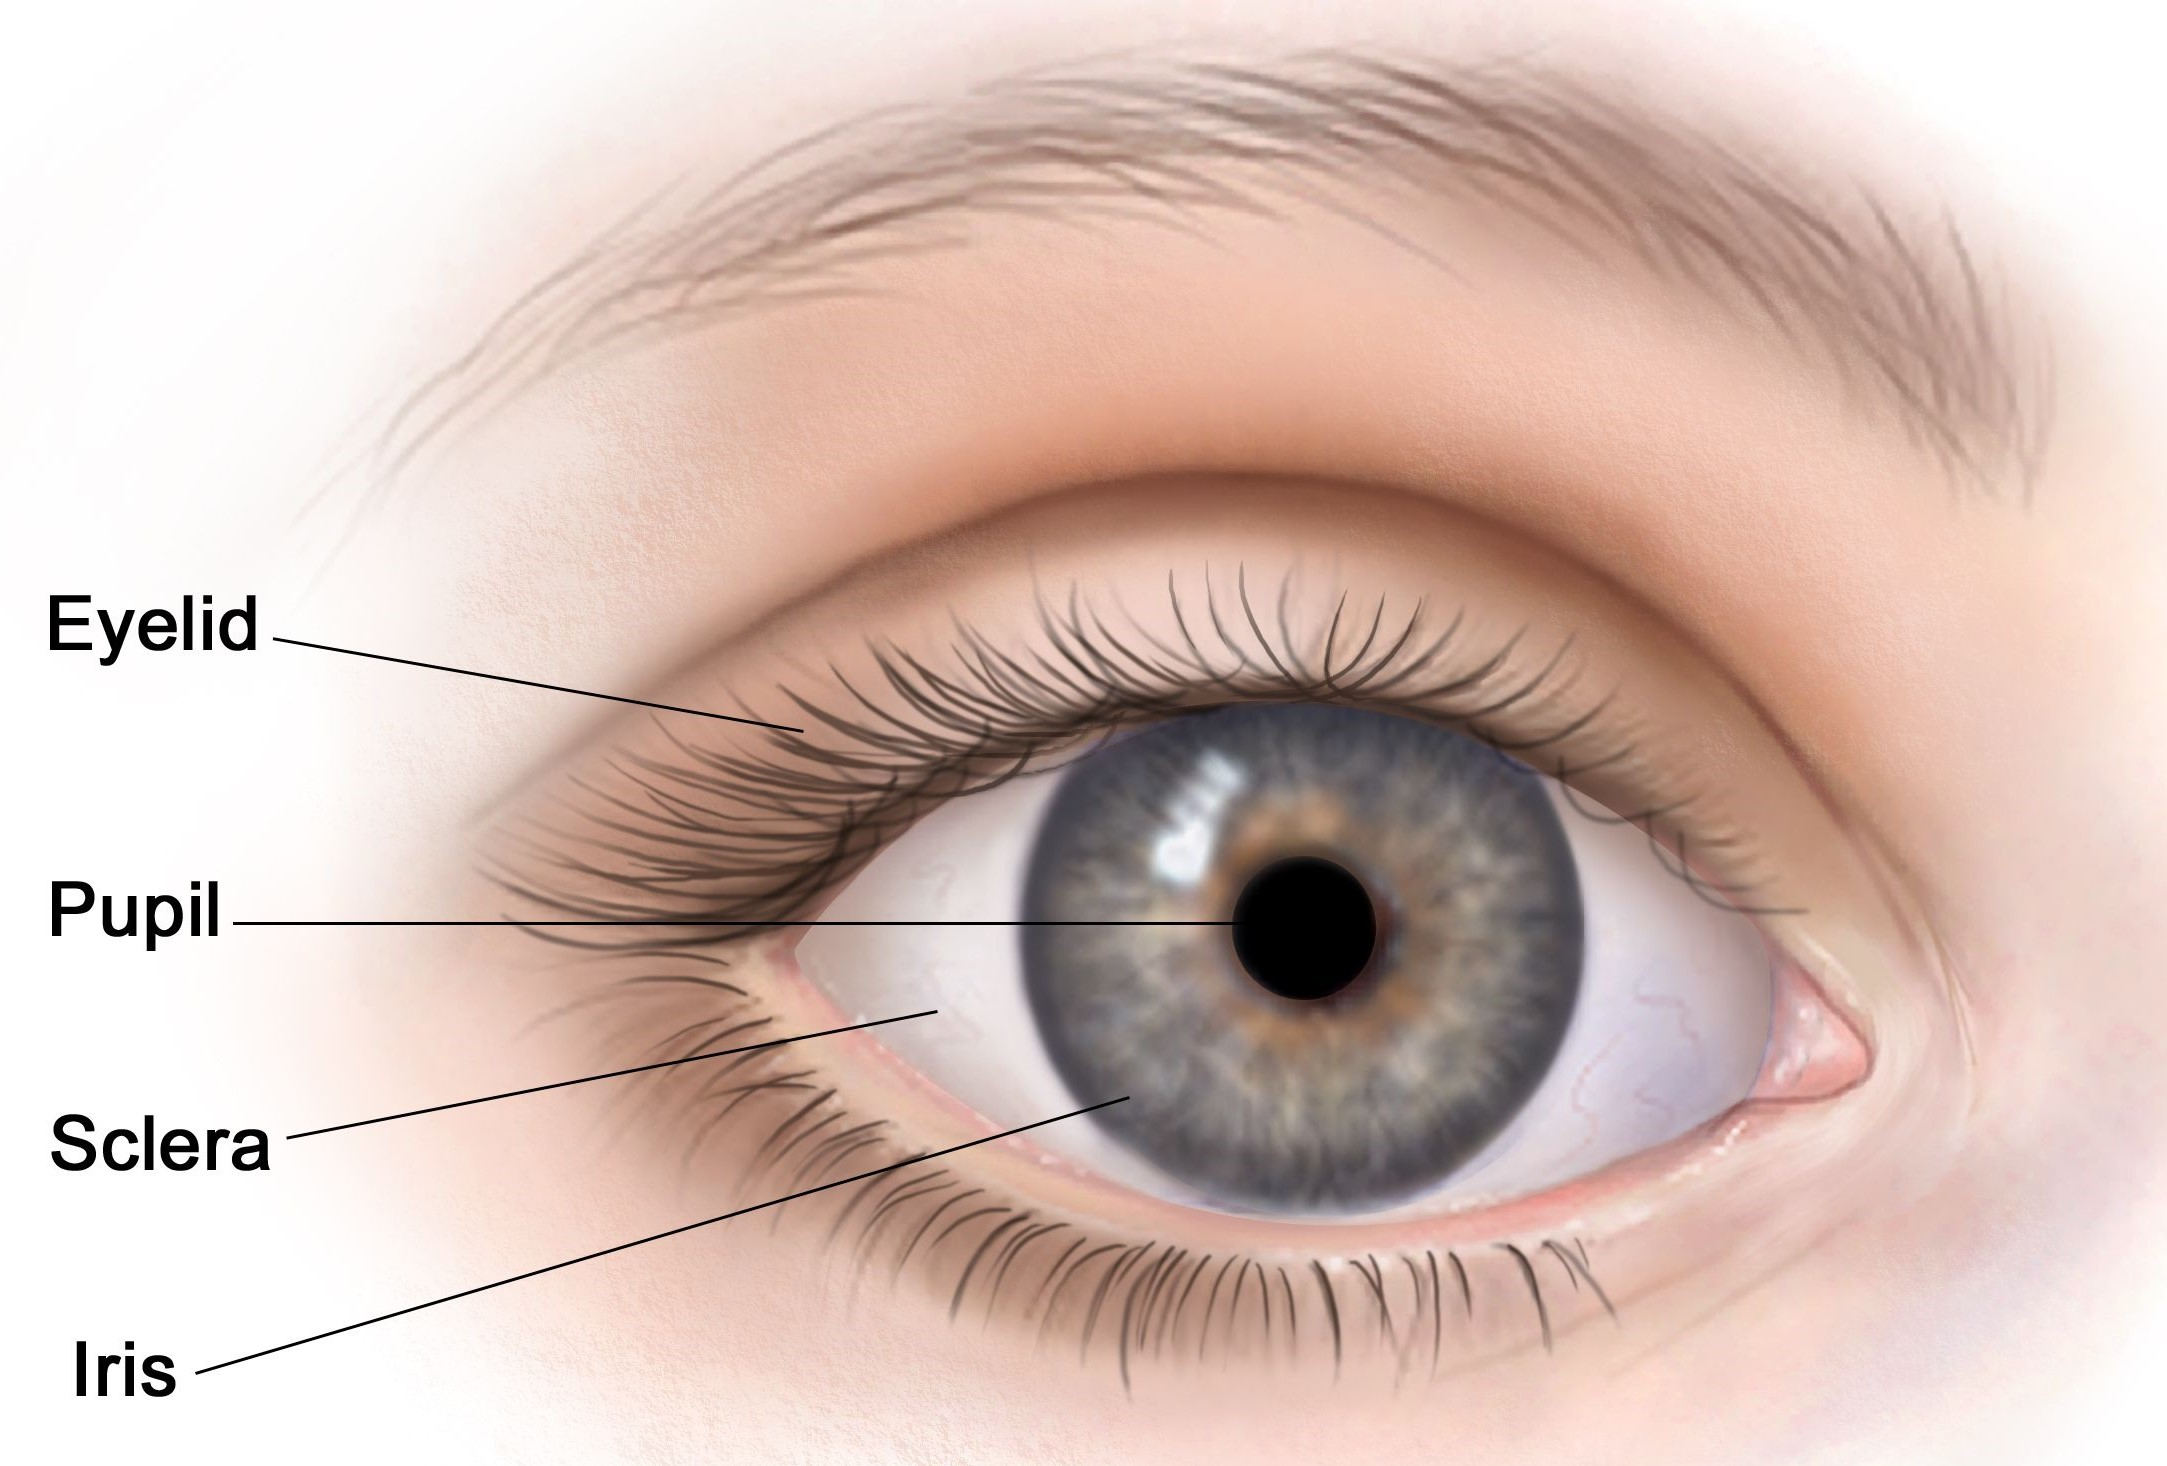

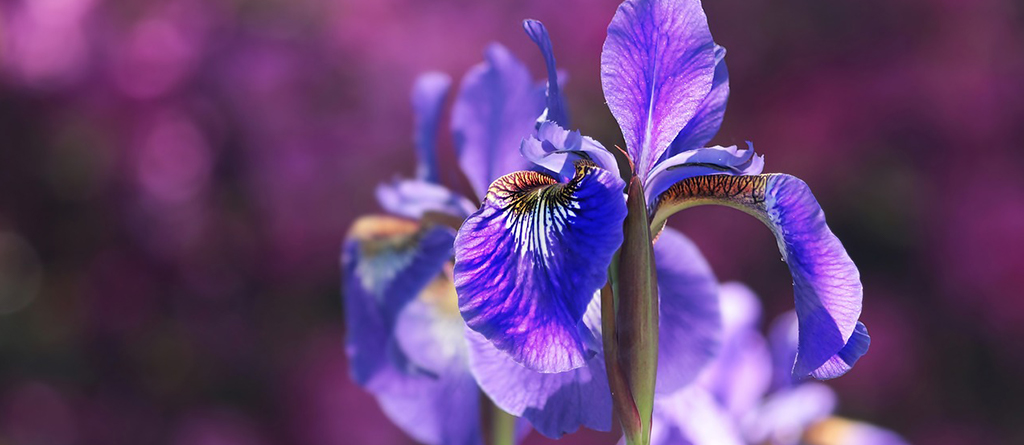

## Iris Dataset
The dataset was generated in 1936 by the British statistician and biologist Ronald Fisher. It contains 150 samples in total, comprising 50 samples of 3 different species of Iris plant (Iris Setosa, Iris Versicolour and Iris Virginica).

In [1]:
import pandas as pd   #library for working with data
import matplotlib as mpl  #library for plots
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  #library for 3D plotting
import seaborn as sns
#library for machine learning tools
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
#library for cluster visualizers
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

mpl.rcParams["figure.figsize"] = (9,6)

In [2]:
## Importing datset
dataset = pd.read_csv(r'C:\Users\Praveen Shahani\Downloads\Task 2 dataset.csv')

In [3]:
# Representing dataset
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


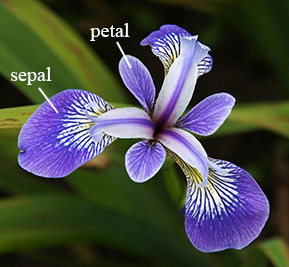

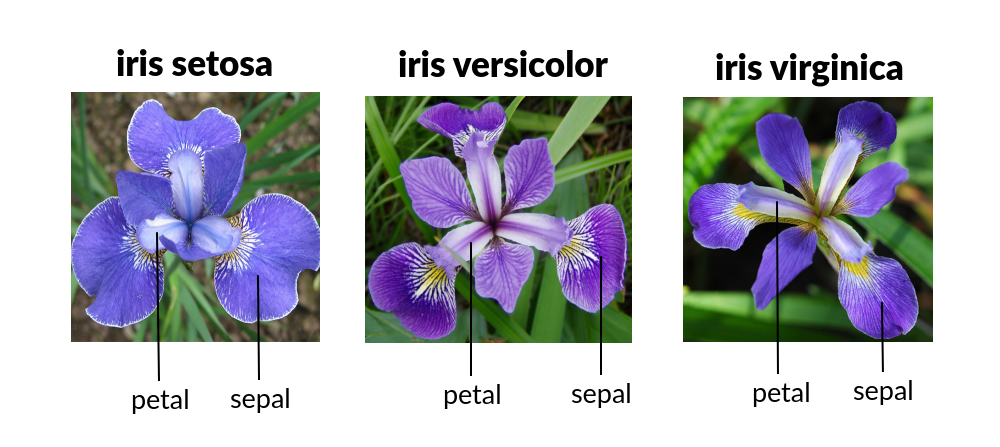

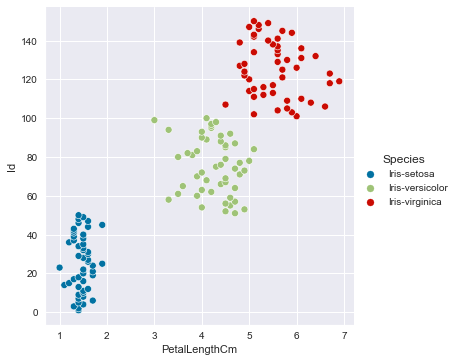

<Figure size 720x576 with 0 Axes>

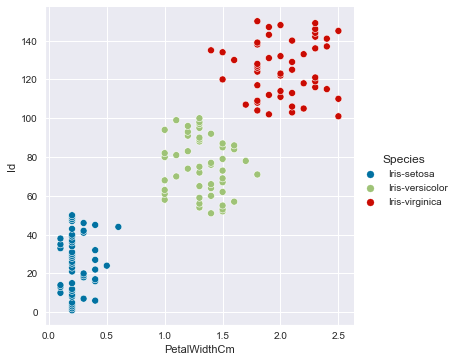

In [4]:
## Understanding the abstract phenonmenon and comapring with the intuitive observation to understand the result
sns.set_style('darkgrid')
sns.relplot(x='PetalLengthCm',y='Id',hue='Species',data=dataset)
plt.figure(figsize=(10,8))
sns.relplot(x='PetalWidthCm',y='Id',hue='Species',data=dataset)

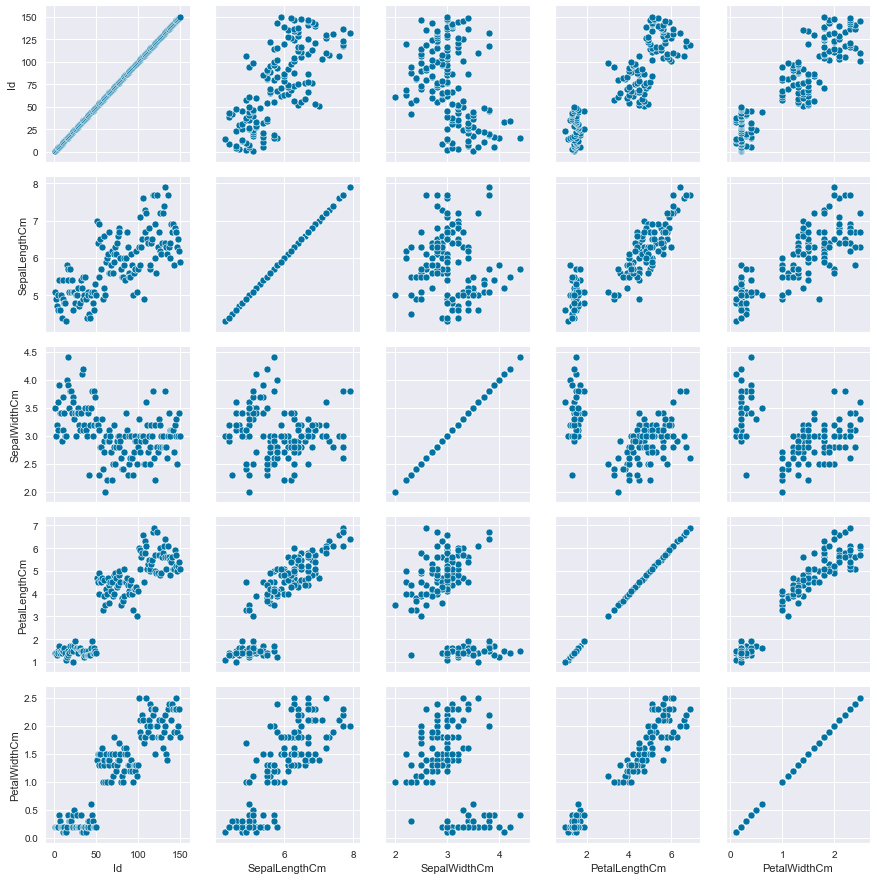

In [5]:
g = sns.PairGrid(dataset) # Pairing the variables
g.map(sns.scatterplot)   #mapping the variables through scatterplot

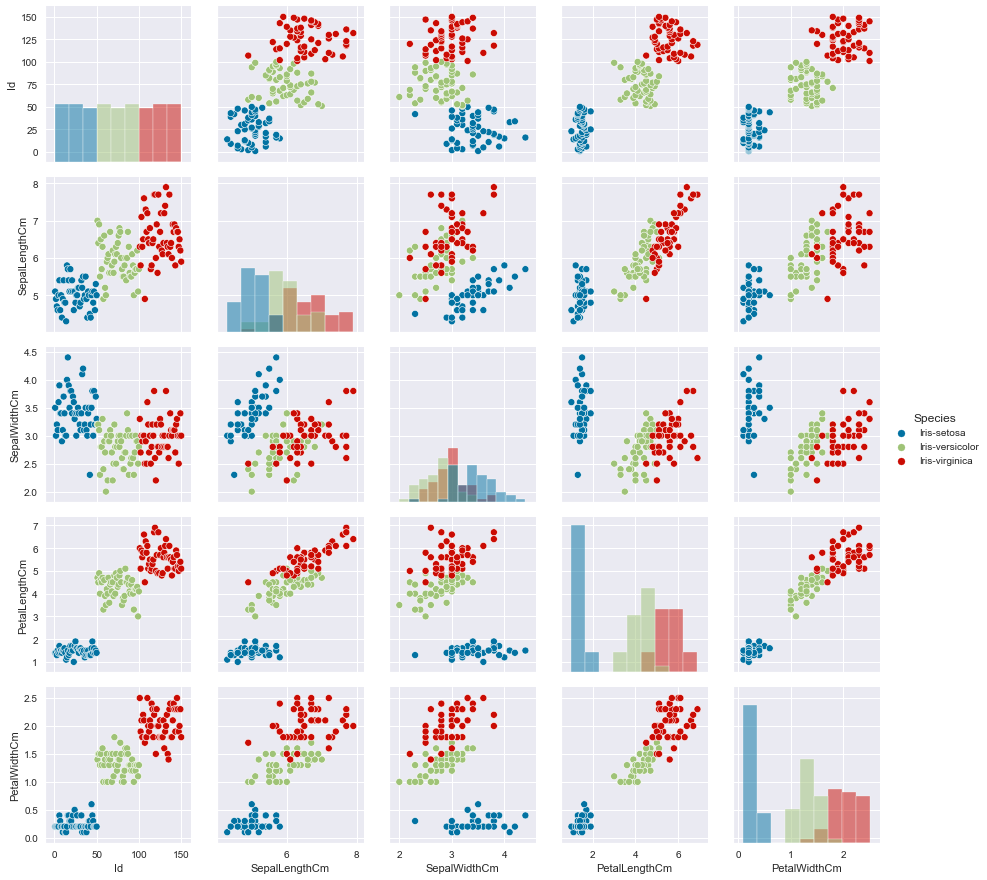

In [6]:
g = sns.PairGrid(dataset, hue="Species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

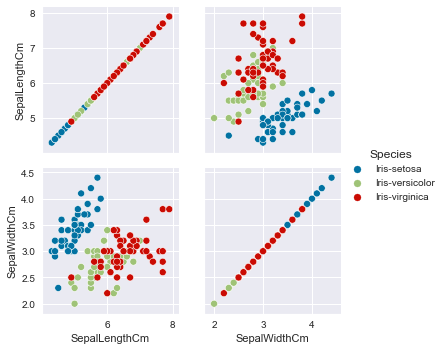

In [7]:
g = sns.PairGrid(dataset, vars=["SepalLengthCm", "SepalWidthCm"], hue="Species")
g.map(sns.scatterplot)
g.add_legend()

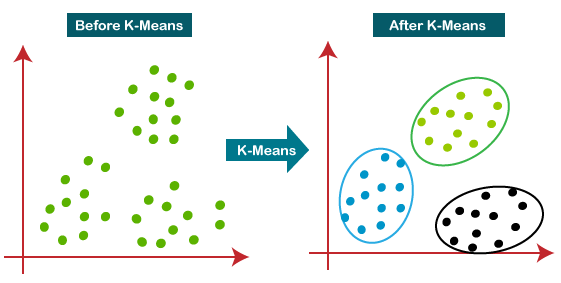

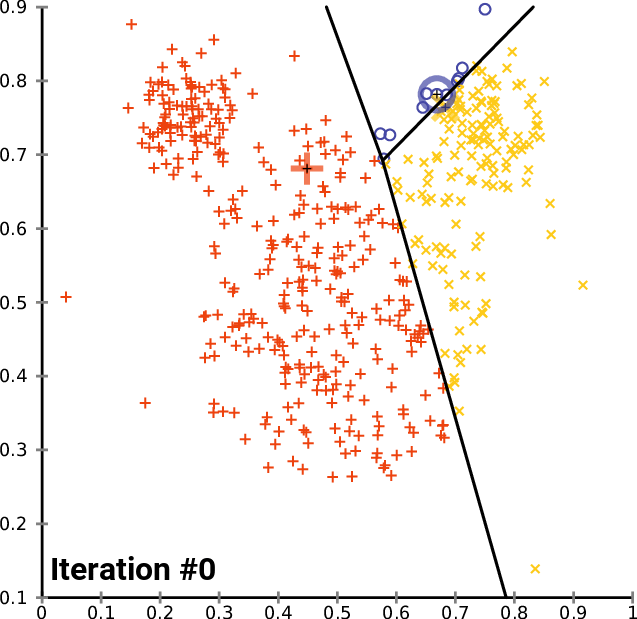

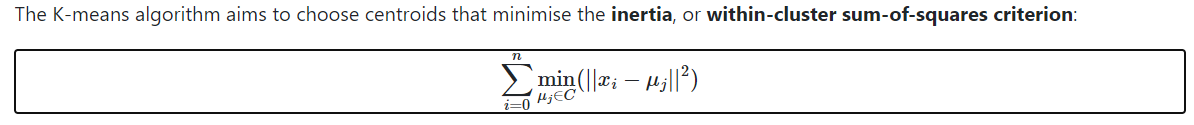

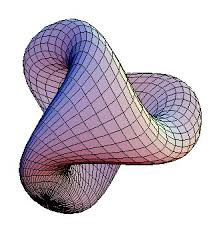

In [32]:
x=dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y=dataset['Species'].values
#X = x.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

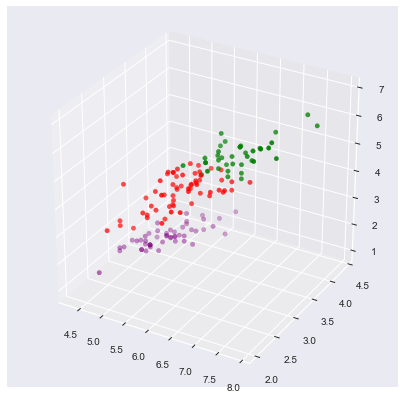

In [44]:
# This cell intends to give a visual sense of clusters in 3D
# Plotting a 3d plot using matplotlib to visualize the data points
k_means = KMeans(n_clusters=3)
k_means.fit(x)

fig = plt.figure(figsize=(7,7))  #Establishing figure size
ax = fig.add_subplot(111, projection='3d')   #defining the type of plot

# Setting the colors to match cluster results
colors = ['red' if label == 0 else 'purple' if label==1 else 'green' for label in k_means.labels_]

ax.scatter(x[:,0], x[:,1], x[:,2], c=colors)

In [43]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0, 0.5, 'SSE')

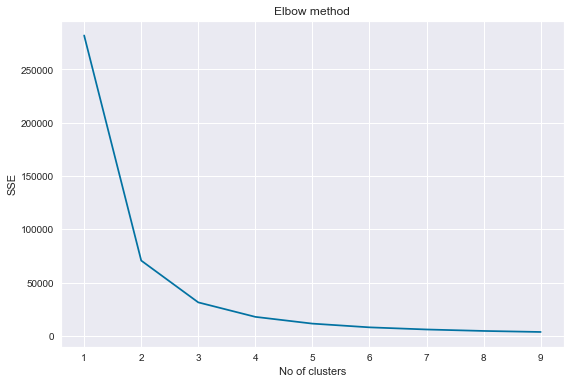

In [20]:
Range=range(1,10)
Sum_of_squared_errors=[]
for i in Range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    Sum_of_squared_errors.append(km.inertia_)
plt.plot(range(1, 10), Sum_of_squared_errors)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('SSE')

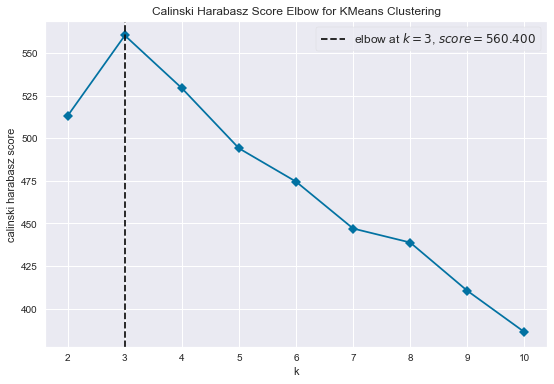

In [45]:
# Instantiate the clustering model and visualizer 
# using the library yellowbrick
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False)

visualizer.fit(x)    
visualizer.show()    

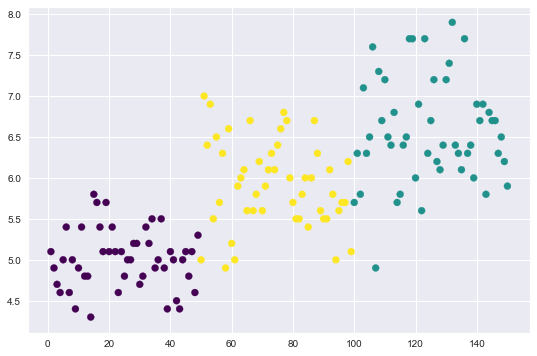

In [22]:
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(x)
predicted_clusters=kmeans_3.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=predicted_clusters,cmap='viridis')

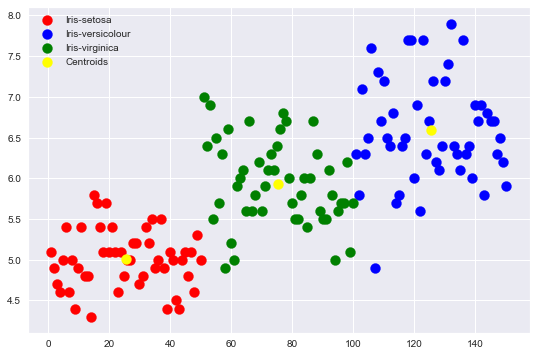

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

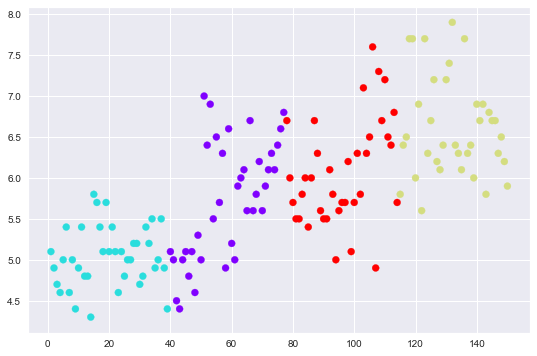

In [24]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(x)
kmeans4.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=y_kmeans4,cmap='rainbow')

## Reference 
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.

https://www.cs.utah.edu/~jeffp/teaching/cs5955/L10-kmeans.pdf

https://www.cse.iitd.ac.in/~rjaiswal/2015/col870/Project/Nipun.pdf